1. Import dependencies:

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image 
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras  

2. Loading data:

A- Loading the both data:

In [ ]:
data_withMask = os.listdir('data\with_mask')
data_withoutMask = os.listdir('data\without_mask')

B- Verify the data;

In [ ]:
print(data_withMask[0:5])
print(data_withoutMask[0:5])

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']
['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg']


C- Number of images:

In [ ]:
print(len(data_withMask))
print(len(data_withoutMask))

3725
3828


3. Label of images:

A- Creating the labels:

In [ ]:
withMask_label = [1]*3725
withoutMask_label = [0]*3828

In [ ]:
print(withMask_label[0:5])
print(withoutMask_label[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(withMask_label))
print(len(withoutMask_label))

3725
3828


B- Creatiing the label of the both datas:

In [ ]:
labels = withoutMask_label + withMask_label
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]


4. Image preprocessing:

A- Displaying one mask images:

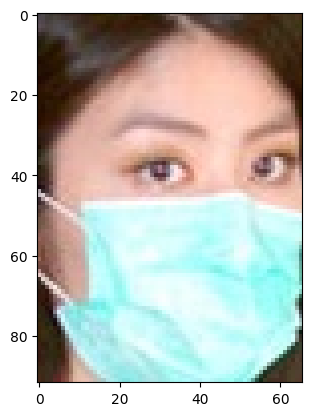

In [ ]:
img = mpimg.imread('data\with_mask\with_mask_3.jpg')
plt.imshow(img)

B- Displayinh and images without mask:

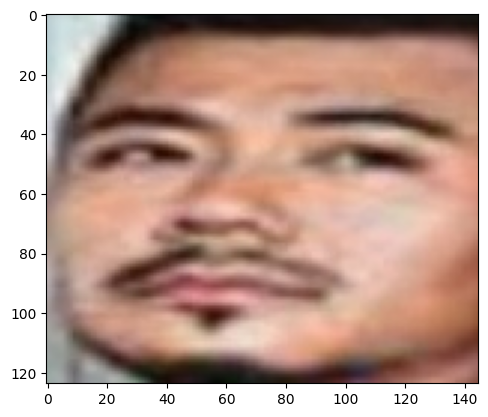

In [ ]:
img = mpimg.imread('data\without_mask\without_mask_11.jpg')
plt.imshow(img)

C- Converting & resising image to numpy array:

In [ ]:
fileMask = 'G:/Mon Drive/Deep_learning Python/TestMask/data/with_mask/'
fileWithoutMask = 'G:/Mon Drive/Deep_learning Python/TestMask/data/without_mask/'
data = []
for img in data_withMask:
    image = Image.open(fileMask + img)
    image = image.resize( (128 ,128) )
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

for img in data_withoutMask:
    image = Image.open(fileWithoutMask + img)
    image = image.resize( (128 ,128) )
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)




KeyboardInterrupt: 

D- Type of the data:

In [ ]:
type(data)

list

E- Number of images in data:

In [ ]:
len(data)

7553

F- View some images:

In [ ]:
data[0:3]

[array([[[50, 58, 31],
         [46, 55, 33],
         [56, 58, 42],
         ...,
         [27, 32, 25],
         [29, 33, 19],
         [33, 40, 17]],
 
        [[47, 54, 30],
         [49, 58, 36],
         [59, 63, 40],
         ...,
         [18, 21, 11],
         [37, 42, 31],
         [31, 41, 23]],
 
        [[51, 58, 37],
         [50, 59, 37],
         [59, 64, 37],
         ...,
         [45, 44, 30],
         [29, 34, 27],
         [20, 30, 18]],
 
        ...,
 
        [[63, 73, 37],
         [66, 75, 41],
         [74, 84, 50],
         ...,
         [ 5,  3,  0],
         [20, 19, 14],
         [17, 16, 12]],
 
        [[58, 72, 34],
         [60, 70, 39],
         [68, 75, 49],
         ...,
         [16, 15, 12],
         [15, 13, 10],
         [13,  9,  7]],
 
        [[53, 69, 30],
         [53, 64, 37],
         [57, 64, 42],
         ...,
         [18, 18, 16],
         [16, 13, 12],
         [19, 12, 13]]], dtype=uint8),
 array([[[117,  61,  15],
         [121,  

G- Type & dimmenssion of the images:

In [ ]:
print(data[0].shape)
print(type(data[0]))

(128, 128, 3)
<class 'numpy.ndarray'>


5. To numpy array:

A- Separating the variables:

In [ ]:
X = np.array(data)
Y = np.array(labels)

B- Type of X & Y:

In [ ]:
print(type(X))
print(type(Y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


C- Shape of X & Y:

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


6. Train test split:

A- Creating the variables of testing & training:

B- Shape of X & X_train & X_test:

In [ ]:
print(X.shape , X_train.shape , X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


C- Scaling the data:

In [ ]:
X_trainStd = X_train / 255
X_testStd = X_test / 255

In [ ]:
X_trainStd[0][0][0]

array([0.88627451, 0.91764706, 0.78823529])

7. Building our neural network (CNN) :

A- Number of classes:

In [ ]:
numClasses = 2 # With mask & without mask

B- Creating the model:

In [ ]:
#Initialise le model (model couche par couche)
model = keras.Sequential() 

#1er cocuhe de convolution avec:
    #32: 32 noyuax ou nombre de filtres
    #(3,3) : taille de chaque filre (carré 3*3) 
    #La fonction d'activation : ajouter la nom linéarité au model
    #Input shape: definit la forme des donées d'entre (image 128*128 avec format (RGB))
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))

#1er couche de poling 
    #Pol size (2,2): taille de fenetre de poling qui reduit chaque dim de la carte par un facteur de 2
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

#2eme couche de convolution:
    #64: 64 noyuax ou nombre de filtres
    #(3,3) : taille de chaque filre (carré 3*3) 
    #La fonction d'activation : ajouter la nom linéarité au model
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))

#2eme couche de poling 
    #Pol size (2,2): taille de fenetre de poling qui reduit chaque dim de la carte par un facteur de 2
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

#Applatissement des donées:
    #Converir les caractéristique 2D en un vecteur 1D
model.add(keras.layers.Flatten())

#1er Couche dense:
    #Ajout une couche dense avec 128 unité
    #Utilisation de la fonction d'activation Relu
model.add(keras.layers.Dense(128, activation='relu'))

#1er couche de dropout:
    #Couche qui abondnne 50% des caractéristique (diversité de caratérisiques)
model.add(keras.layers.Dropout(0.5))

#2eme couche dense:
    #Couche avec 64 unités
model.add(keras.layers.Dense(64, activation='relu'))

#2eme couche dropout:
model.add(keras.layers.Dropout(0.5))

#Couche de sortie:
    #Identifier le nombre de class a predire + la fnct d'activation
model.add(keras.layers.Dense(numClasses, activation='sigmoid'))


C- Compiling the model:

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

D- Training the model:

In [ ]:
history = model.fit(X_trainStd, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5


170/170 [==============================] - 27s 150ms/step - loss: 0.4992 - acc: 0.7830 - val_loss: 0.3132 - val_acc: 0.8843
Epoch 2/5
170/170 [==============================] - 26s 153ms/step - loss: 0.3225 - acc: 0.8766 - val_loss: 0.2710 - val_acc: 0.9091
Epoch 3/5
170/170 [==============================] - 26s 156ms/step - loss: 0.2612 - acc: 0.8981 - val_loss: 0.3203 - val_acc: 0.8793
Epoch 4/5
170/170 [==============================] - 27s 158ms/step - loss: 0.2395 - acc: 0.9161 - val_loss: 0.2379 - val_acc: 0.9207
Epoch 5/5
170/170 [==============================] - 26s 154ms/step - loss: 0.2042 - acc: 0.9257 - val_loss: 0.2391 - val_acc: 0.9240


E- Accuracy & score:

In [ ]:
loss , accuracy = model.evaluate(X_testStd , Y_test)
print("Accuracy score:", accuracy)
print("Loss score: ", loss)

48/48 [==============================] - 1s 30ms/step - loss: 0.2449 - acc: 0.9054
Accuracy score: 0.9053606986999512
Loss score:  0.24487851560115814


F- Visulasiation of score & accuracy:

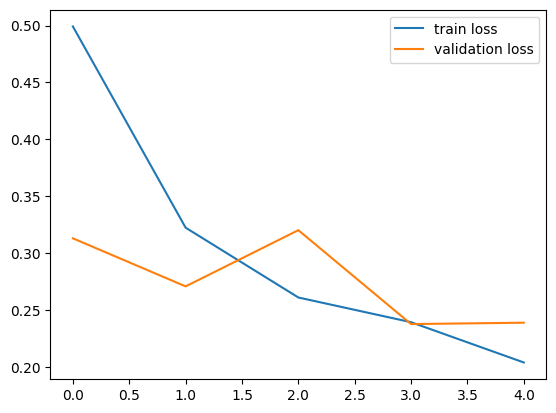

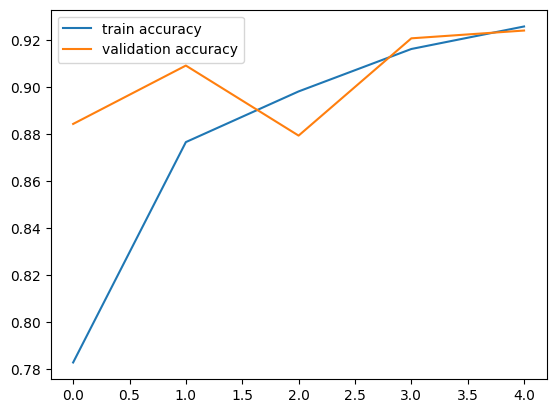

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

G- Save the model:

In [2]:
# After training the model, save it to a file:
model.save('path_to_my_model.h5')

NameError: name 'model' is not defined

8. Example:

A- Loading the model:

In [8]:
model = keras.models.load_model('path_to_my_model.h5')

In [5]:
from tensorflow import keras  


1/1 [==============================] - 0s 448ms/step


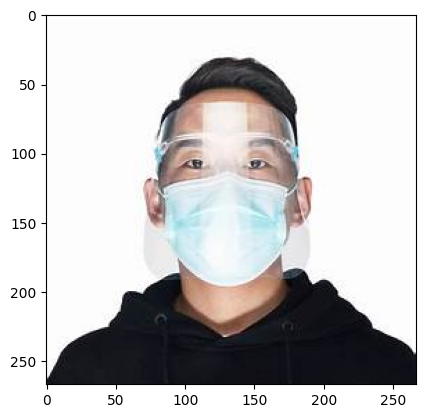

The predicted number is: 0
The person is wearing a mask


In [6]:


def maskPrediction(path):
    input_image = Image.open(path)
    # Redimensionner l'image à 128x128 pixels
    image_resized = input_image.resize((128, 128))
    # Convertir l'image PIL en un array numpy
    image_np = np.array(image_resized)
    # Normaliser les pixels
    image_np_normalized = image_np / 255.0
    image_reshaped = np.reshape(image_np_normalized, [1, 128, 128, 3])
    # Prédire la classe
    predict = model.predict(image_reshaped)
    predict_mask = np.argmax(predict)
    # Afficher l'image originale
    plt.imshow(input_image)
    plt.show()
    print('The predicted number is:', predict_mask)
    if (predict_mask == 0):
        print("The person is wearing a mask")
    else:  
        print("The person isn't wearing a mask")

# Exemple d'utilisation
path = "OIP.jpeg"
maskPrediction(path)

